# Introduction

Elections are multi-faceted events, and everything from campaigning to the vocabulary in candidate's speeches is carefully chosen. However, an often overlooked aspect of the election is whether or not a U.S. Citizen will actually complete the political process. Our project seeks to address this issue by simply asking whether or not a given person (based on a number of factors) will actually cast their ballot.



# Data Description and Cleaning

# Preregistration Statement

# Data Analysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.stats import binom, poisson, norm
from numpy import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from scipy.special import comb
import duckdb
from sklearn import preprocessing


In [26]:
demographics = pd.read_csv('data/election_demographics_amended.csv')

demographics = demographics.dropna()
demographics['Presidential'] = demographics['Presidential'].astype(int)
# demographics['PercentWhite'] = np.log(demographics['PercentWhite'])

demographics_presidential = duckdb.sql("""SELECT * FROM demographics WHERE Presidential=1 AND State!='District of Columbia'""").df()
# demographics_midterm = duckdb.sql("""SELECT * FROM demographics WHERE Presidential=False""").df()

columns = ['Income','PercentWhite','AverageAge']

# x = sm.add_constant(demographics_presidential[columns])
x=demographics_presidential[columns]
model = sm.OLS(demographics_presidential['PercentVotingEligibleVotes'],x).fit()
print(model.summary())


# x = sm.add_constant(demographics_midterm[columns])
# model = sm.OLS(demographics_midterm['PercentVotingEligibleVotes'],x).fit()
# print(model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     PercentVotingEligibleVotes   R-squared (uncentered):                   0.994
Model:                                    OLS   Adj. R-squared (uncentered):              0.994
Method:                         Least Squares   F-statistic:                              9855.
Date:                        Mon, 18 Nov 2024   Prob (F-statistic):                   1.95e-198
Time:                                19:10:04   Log-Likelihood:                          287.59
No. Observations:                         182   AIC:                                     -569.2
Df Residuals:                             179   BIC:                                     -559.6
Df Model:                                   3                                                  
Covariance Type:                    nonrobust                                                  
                   coef    std err      

Text(0, 0.5, 'Residual')

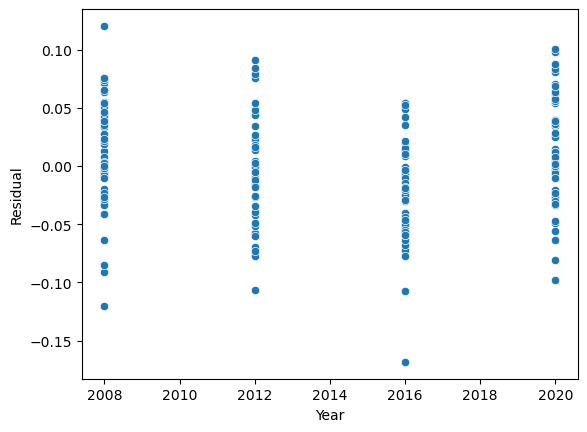

In [12]:
yhat = model.predict()
residuals = demographics_presidential['PercentVotingEligibleVotes'] - model.predict()
sns.scatterplot(y=residuals, x=demographics_presidential['Year'])
plt.ylabel('Residual')

# Evaluation of Significance

# Conclusions

# Limitations

# Acknowledgements and Bibliography